In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Open a rectified retardance and azimuth image.

In [4]:
rectification_folder = "C:/Users/Geneva/Box/03_Shared/PolLFM/Xylem cells/rectification/"
ret_filename = os.path.join(rectification_folder, "rectified_nodark_ret_slice_14.png")
azim_filename = os.path.join(rectification_folder, "rectified_nodark_azim_slice_14.png")

In [25]:
# Open the image
image = Image.open(ret_filename)

# Count the number of pixels
num_pixels = image.size[0] * image.size[1]

print(f"total pixels: {num_pixels}, image size: {image.size}")

total pixels: 4515625, image size: (2125, 2125)


Determine the number of microlenses. There are 17x17 pixels behind each microlens.

In [21]:
2125 / 17

125.0

## Save a smaller version of the rectified images.

In [26]:
# Open the images
ret_image = Image.open(ret_filename)
azim_image = Image.open(azim_filename)

# Define the coordinates of the subsection (left, upper, right, lower)
# This corresponds to a 10x10 grid of microlenses
box = (0, 0, 10*17, 10*17)

# Crop the images
ret_subsection = ret_image.crop(box)
azim_subsection = azim_image.crop(box)

# # Save the subsections
# ret_subsection.save('ret_subsection.png')
# azim_subsection.save('azim_subsection.png')

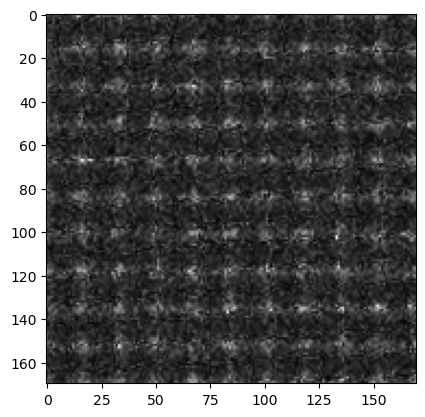

In [27]:
plt.imshow(ret_subsection, cmap='gray')

In [16]:
type(ret_subsection)

PIL.Image.Image

Invert the image.

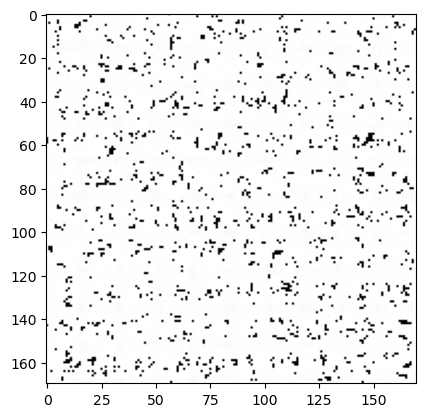

In [28]:
# Convert the image to a numpy array
image_array = np.array(ret_subsection)

# Invert the colors
inverted_array = 255 - image_array

# Convert the numpy array back to an image
inverted_image = Image.fromarray(inverted_array)

plt.imshow(inverted_array, cmap='gray')

In [29]:
max(inverted_array.flatten())

65535

### Use scikit-image

In [16]:
import skimage.io as io
from skimage import util

(2125, 2125)


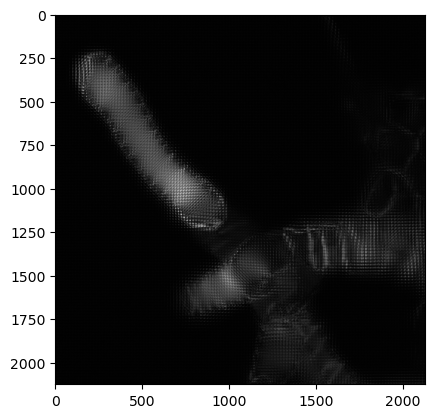

In [10]:
ret_image = io.imread(ret_filename)
azim_image = io.imread(azim_filename)

# Check the image shape (height, width, channels)
print(ret_image.shape)

plt.imshow(ret_image, cmap='gray')

In [14]:
def plot_images_side_by_side(ret_image, azim_image):
    ret_array = np.array(ret_image)
    azim_array = np.array(azim_image)

    plt.figure()
    # Display ret_image in the first subplot
    plt.subplot(1, 2, 1)
    plt.imshow(ret_array, cmap='gray')
    plt.title('ret_image')
    # Display azim_image in the second subplot
    plt.subplot(1, 2, 2)
    plt.imshow(azim_array, cmap='gray')
    plt.title('azim_image')

    plt.show()

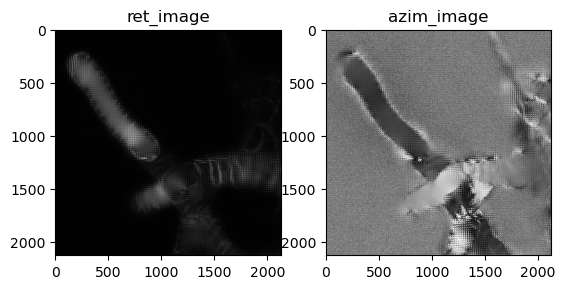

In [15]:
plot_images_side_by_side(ret_image, azim_image)

In [18]:
def crop_lf_image(image):
    new_height = 10*17
    new_width = 10*17
    cropped_image = image[:new_height, :new_width]
    # cropped_image = util.crop(image, ((0, new_height), (0, new_width)))
    return cropped_image

In [22]:
cropped_ret = crop_lf_image(ret_image)

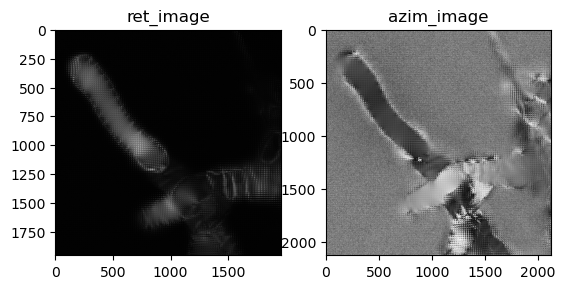

In [23]:
plot_images_side_by_side(cropped_ret, azim_image)

In [24]:
cropped_ret.shape

(1955, 1955)

In [25]:
type(ret_image)

numpy.ndarray